In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from scipy import stats

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

###  Загрузка обучающего и тестового датасетов

In [2]:
data_train = pd.read_csv('content/train_dataset_train.csv')
data_test = pd.read_csv('content/test_dataset_test.csv')

In [3]:
data_train.head()

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,...,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label
0,6818780,1043_-1,628629.0,Участок,7503.0,N,0.0,Y,N,87.0,...,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0
1,9907176,1023_-1,102976.0,ММПО,7503.0,N,0.0,N,N,107.0,...,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0
2,3304275,1018_-1,620962.0,Цех,7503.0,N,0.0,Y,N,50.0,...,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0
3,9020937,1019_-1,344964.0,Цех,7503.0,N,0.0,Y,N,416.0,...,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0,0
4,3082311,1020_-1,629819.0,Участок,7503.0,N,0.0,Y,N,795.0,...,16.0,316919.0,27911.0,344830.0,4719186.0,0,0,0,0,0


In [4]:
data_train.dtypes

id                                 int64
oper_type + oper_attr             object
index_oper                        object
type                              object
priority                         float64
is_privatecategory                object
class                            float64
is_in_yandex                      object
is_return                         object
weight                           float64
mailtype                         float64
mailctg                          float64
mailrank                         float64
directctg                        float64
transport_pay                    float64
postmark                         float64
name_mfi                          object
weight_mfi                       float64
price_mfi                        float64
dist_qty_oper_login_1            float64
total_qty_oper_login_1           float64
total_qty_oper_login_0           float64
total_qty_over_index_and_type    float64
total_qty_over_index             float64
is_wrong_sndr_na

# Разведочный анализ и предобработка данных / *EDA and Preprocessing*
### Посмотрим на распределение переменных и приведем их к рациональному виду

##### *Тип и атрибут операции*

In [5]:
data_train['oper_type + oper_attr'].value_counts().head(7)

1020_-1    693154
1022_-1    656597
1019_-1    413710
8_0        402877
1_-1       359402
1001_-1    353113
1018_-1    317883
Name: oper_type + oper_attr, dtype: int64

In [6]:
data_train[['oper_type', 'oper_attr']] = pd.DataFrame(data_train['oper_type + oper_attr'].str.split('_').tolist(), 
                                                   index=data_train.index).astype(int)
data_test[['oper_type', 'oper_attr']] = pd.DataFrame(data_test['oper_type + oper_attr'].str.split('_').tolist(), 
                                                   index=data_test.index).astype(int)

In [7]:
data_train = data_train.drop('oper_type + oper_attr', axis=1)
data_test = data_test.drop('oper_type + oper_attr', axis=1)

##### *Индекс места операции*

In [8]:
data_train['index_oper'].value_counts().head(7)

102976      938416
102976.0    661191
102971      476859
102971.0    341402
620984       80811
102998       63778
102968       58374
Name: index_oper, dtype: int64

In [9]:
data_train['index_oper'].value_counts().count()

38661

In [10]:
data_train['index_oper'] = np.where(data_train['index_oper'] == ' ', 0, data_train['index_oper'])
data_train['index_oper'] = pd.to_numeric(data_train['index_oper']).astype(int)

data_test['index_oper'] = np.where(data_test['index_oper'] == ' ', 0, data_test['index_oper'])
data_test['index_oper'] = pd.to_numeric(data_test['index_oper']).astype(int)

##### *Обозначение типа объекта почтовой связи*

In [11]:
data_train['type'] = np.where(data_train['type'] == '0', "ПРОЧЕЕ", data_train['type'])
data_test['type'] = np.where(data_test['type'] == '0', "ПРОЧЕЕ", data_test['type'])

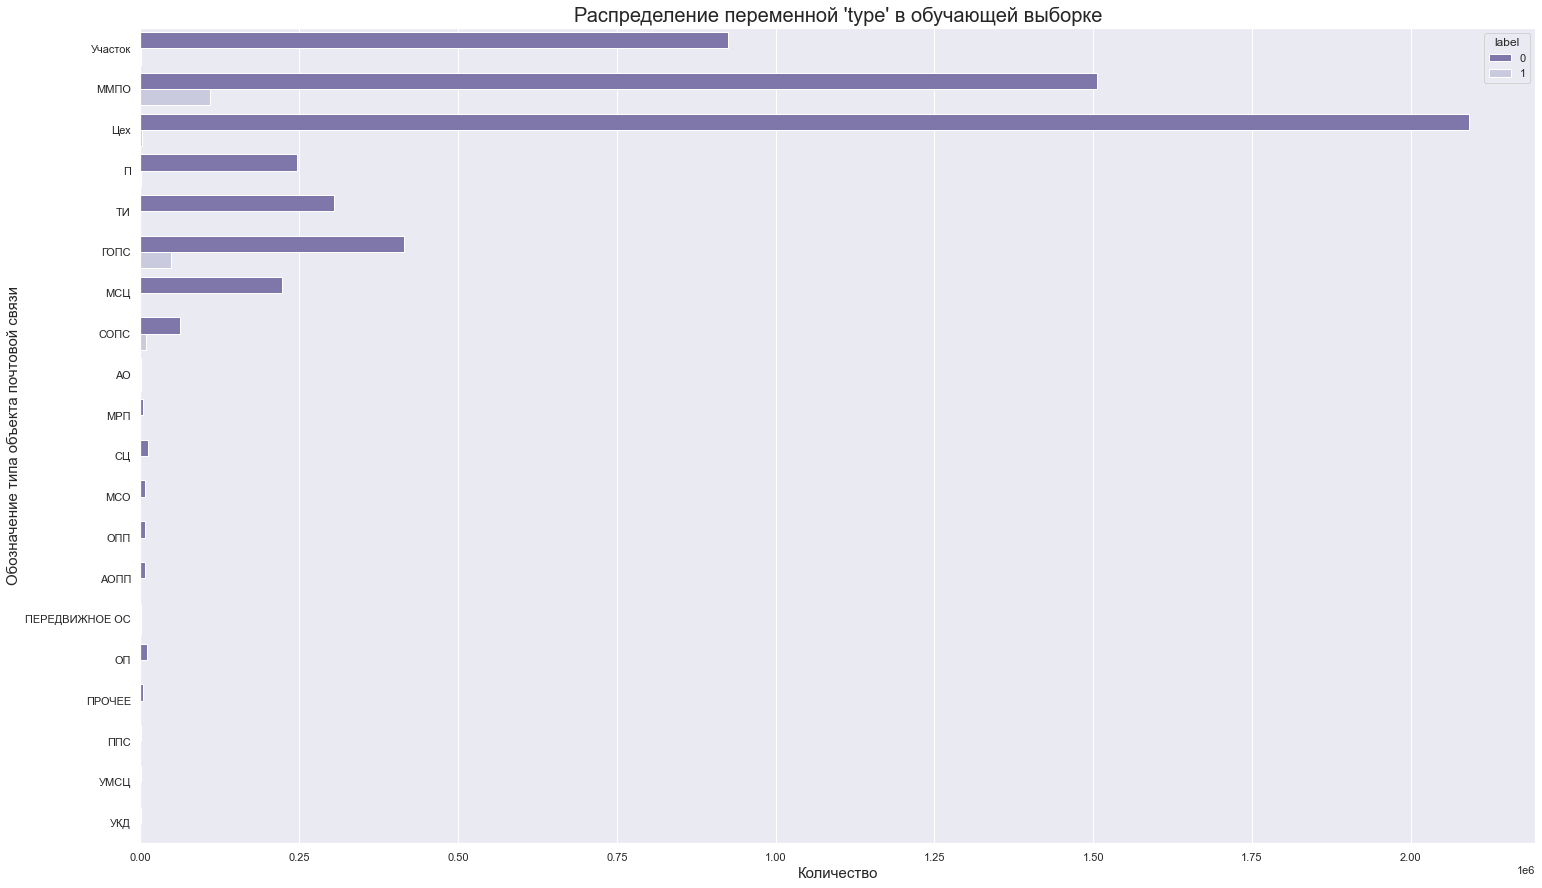

In [12]:
sns.set(rc={'figure.figsize':(25, 15)})
sns.set_style('darkgrid')

plot = sns.countplot(y='type', hue='label', data=data_train, palette='Purples_r')
plot.set_xlabel("Количество", fontsize=15)
plot.set_ylabel("Обозначение типа объекта почтовой связи", fontsize=15)
plot.set_title("Распределение переменной 'type' в обучающей выборке", fontsize=20)
plt.show();

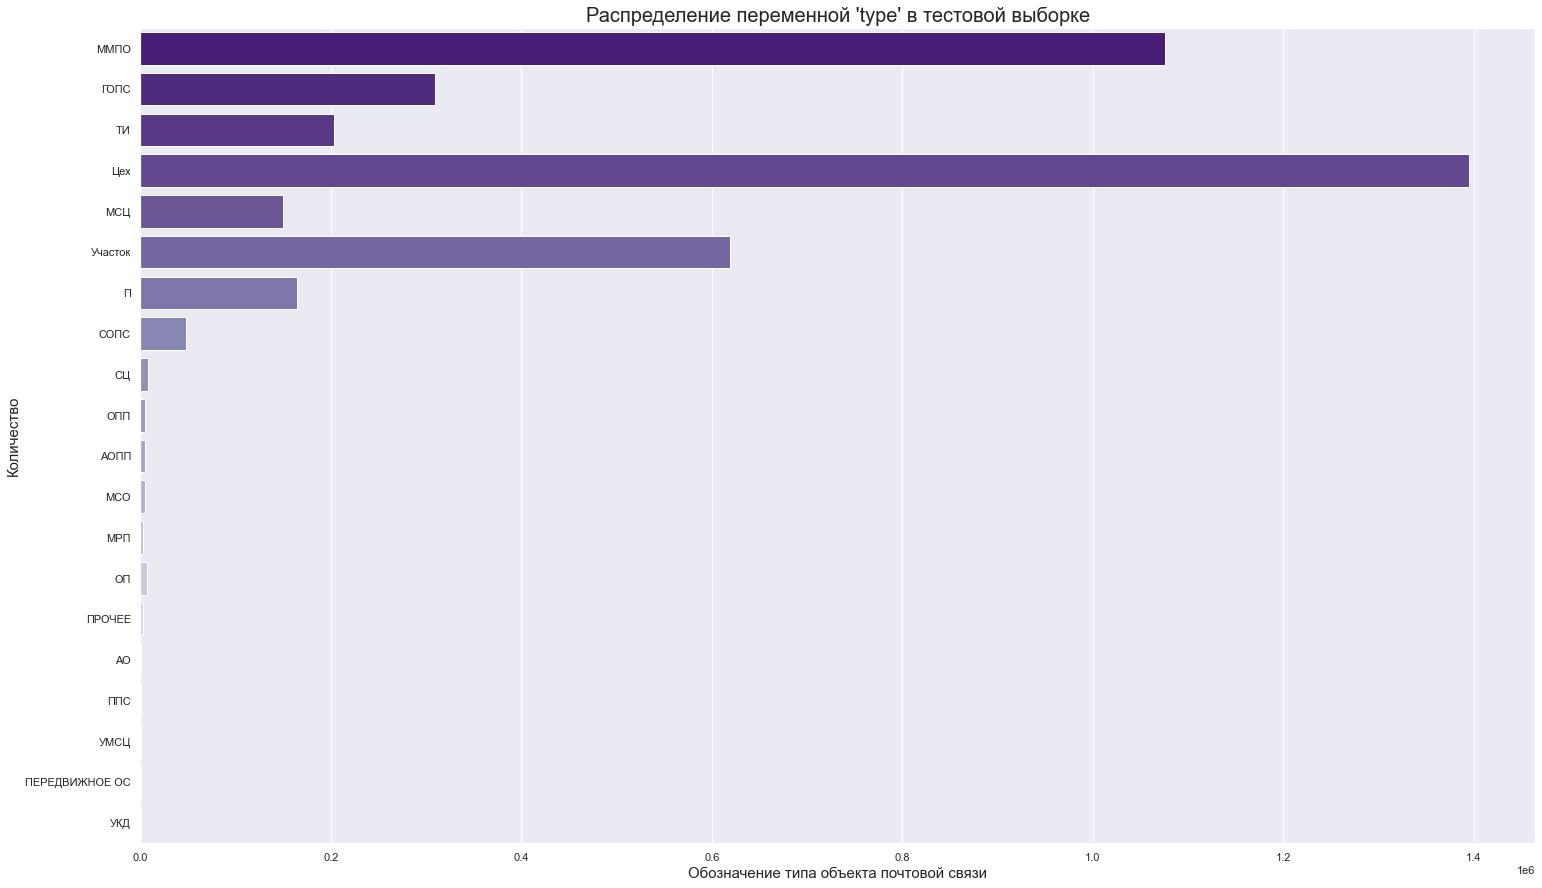

In [13]:
sns.set(rc={'figure.figsize':(25, 15)})
sns.set_style('darkgrid')

plot = sns.countplot(y='type', data=data_test, palette='Purples_r')
plot.set_xlabel("Обозначение типа объекта почтовой связи", fontsize=15)
plot.set_ylabel("Количество", fontsize=15)
plot.set_title("Распределение переменной 'type' в тестовой выборке", fontsize=20)
plt.show();

##### *Значение класса или категории объекта почтовой связи*

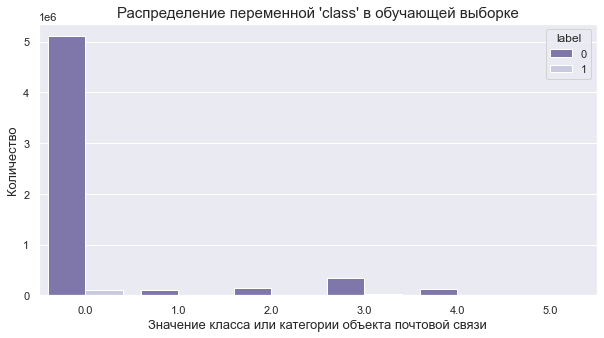

In [14]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style('darkgrid')

plot = sns.countplot(x='class', hue=data_train['label'], data=data_train, palette='Purples_r')
plot.set_xlabel("Значение класса или категории объекта почтовой связи", fontsize=13)
plot.set_ylabel("Количество", fontsize=13)
plot.set_title("Распределение переменной 'class' в обучающей выборке", fontsize=15)
plt.show();

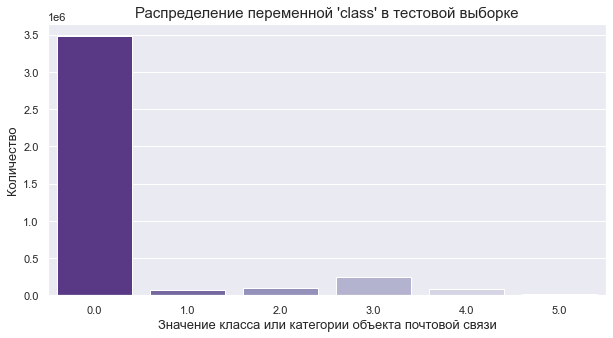

In [15]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style('darkgrid')

plot = sns.countplot(x='class', data=data_test, palette='Purples_r')
plot.set_xlabel("Значение класса или категории объекта почтовой связи", fontsize=13)
plot.set_ylabel("Количество", fontsize=13)
plot.set_title("Распределение переменной 'class' в тестовой выборке", fontsize=15)
plt.show();

##### *Бинарные категориальные признаки*

##### Обучающая выборка

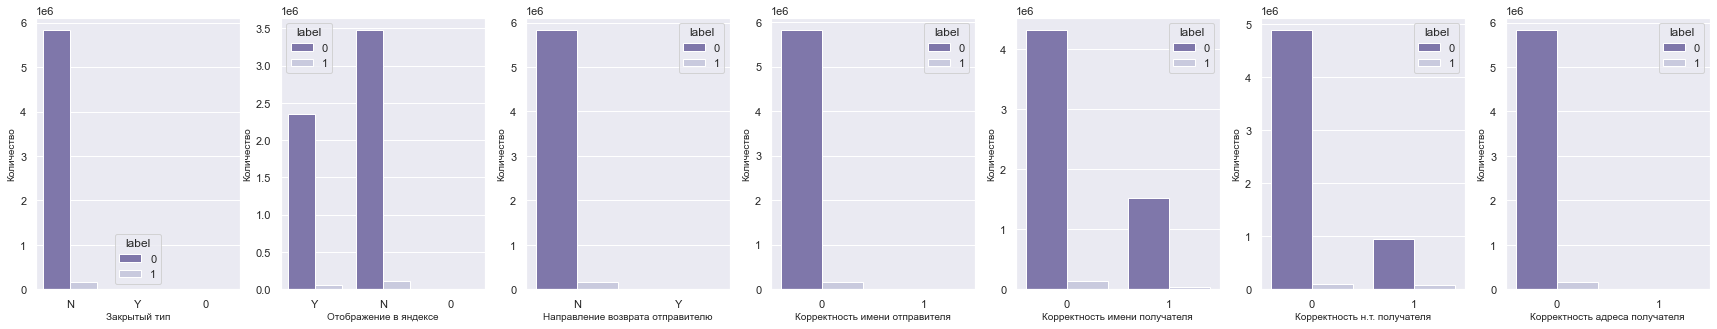

In [16]:
sns.set(rc={'figure.figsize':(30, 5)})
fig, ax = plt.subplots(1,7)

plot1 = sns.countplot(data_train['is_privatecategory'], hue=data_train['label'], 
                      ax=ax[0], palette='Purples_r');
plot1.set_ylabel("Количество", fontsize=10)
plot1.set_xlabel("Закрытый тип", fontsize=10)

plot2 = sns.countplot(data_train['is_in_yandex'], hue=data_train['label'], 
                      ax=ax[1], palette='Purples_r');
plot2.set_ylabel("Количество", fontsize=10)
plot2.set_xlabel("Отображение в яндексе", fontsize=10)

plot3 = sns.countplot(data_train['is_return'], hue=data_train['label'], 
                      ax=ax[2], palette='Purples_r');
plot3.set_ylabel("Количество", fontsize=10)
plot3.set_xlabel("Направление возврата отправителю", fontsize=10)

plot4 = sns.countplot(data_train['is_wrong_sndr_name'], hue=data_train['label'], 
                      ax=ax[3], palette='Purples_r');
plot4.set_ylabel("Количество", fontsize=10)
plot4.set_xlabel("Корректность имени отправителя", fontsize=10)

plot5 = sns.countplot(data_train['is_wrong_rcpn_name'], hue=data_train['label'], 
                      ax=ax[4], palette='Purples_r');
plot5.set_ylabel("Количество", fontsize=10)
plot5.set_xlabel("Корректность имени получателя", fontsize=10)

plot6 = sns.countplot(data_train['is_wrong_phone_number'], hue=data_train['label'],
                      ax=ax[5], palette='Purples_r');
plot6.set_ylabel("Количество", fontsize=10)
plot6.set_xlabel("Корректность н.т. получателя", fontsize=10)

plot7 = sns.countplot(data_train['is_wrong_address'], hue=data_train['label'], 
                      ax=ax[6], palette='Purples_r');
plot7.set_ylabel("Количество", fontsize=10)
plot7.set_xlabel("Корректность адреса получателя", fontsize=10)

fig.show();

##### Тестовая выборка

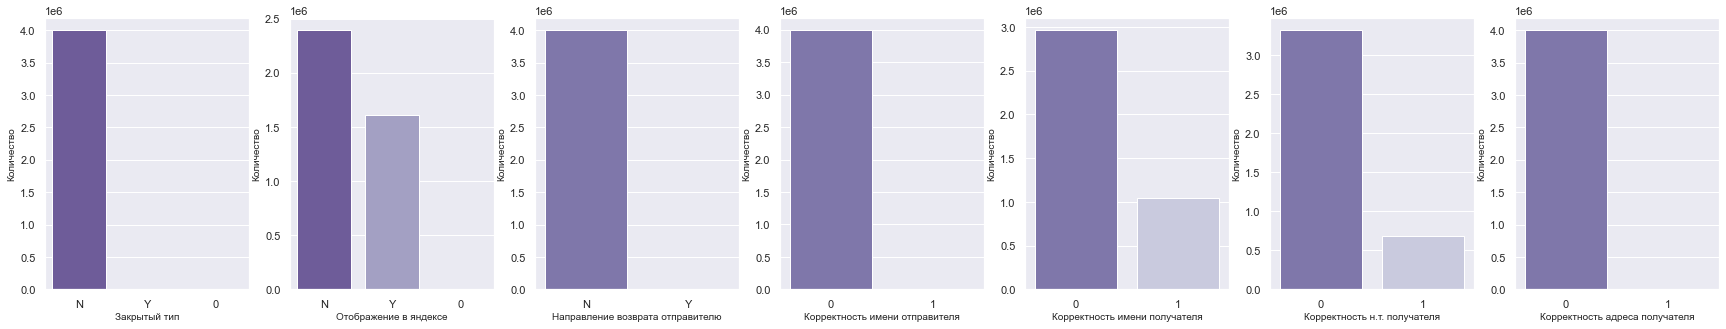

In [17]:
sns.set(rc={'figure.figsize':(30, 5)})
fig, ax = plt.subplots(1,7)

plot1 = sns.countplot(data_test['is_privatecategory'],
                      ax=ax[0], palette='Purples_r');
plot1.set_ylabel("Количество", fontsize=10)
plot1.set_xlabel("Закрытый тип", fontsize=10)

plot2 = sns.countplot(data_test['is_in_yandex'], 
                      ax=ax[1], palette='Purples_r');
plot2.set_ylabel("Количество", fontsize=10)
plot2.set_xlabel("Отображение в яндексе", fontsize=10)

plot3 = sns.countplot(data_test['is_return'], 
                      ax=ax[2], palette='Purples_r');
plot3.set_ylabel("Количество", fontsize=10)
plot3.set_xlabel("Направление возврата отправителю", fontsize=10)

plot4 = sns.countplot(data_test['is_wrong_sndr_name'], 
                      ax=ax[3], palette='Purples_r');
plot4.set_ylabel("Количество", fontsize=10)
plot4.set_xlabel("Корректность имени отправителя", fontsize=10)

plot5 = sns.countplot(data_test['is_wrong_rcpn_name'], 
                      ax=ax[4], palette='Purples_r');
plot5.set_ylabel("Количество", fontsize=10)
plot5.set_xlabel("Корректность имени получателя", fontsize=10)

plot6 = sns.countplot(data_test['is_wrong_phone_number'],
                      ax=ax[5], palette='Purples_r');
plot6.set_ylabel("Количество", fontsize=10)
plot6.set_xlabel("Корректность н.т. получателя", fontsize=10)

plot7 = sns.countplot(data_test['is_wrong_address'], 
                      ax=ax[6], palette='Purples_r');
plot7.set_ylabel("Количество", fontsize=10)
plot7.set_xlabel("Корректность адреса получателя", fontsize=10)

fig.show();

In [18]:
data_train['is_privatecategory'].value_counts(), data_test['is_privatecategory'].value_counts()

(N    5994524
 Y       2806
 0       2670
 Name: is_privatecategory, dtype: int64,
 N    3996480
 Y       1820
 0       1700
 Name: is_privatecategory, dtype: int64)

In [19]:
data_train['is_return'].value_counts(), data_test['is_return'].value_counts()

(N    5993017
 Y       6983
 Name: is_return, dtype: int64,
 N    3995443
 Y       4557
 Name: is_return, dtype: int64)

##### *Текстовая информация*

In [20]:
data_train['name_mfi']

0                                          Fishhook,USB
1          screen protector,Case(Q613B),case(208B40-DB)
2           Pendant Necklaces,Rings for Women,Necklaces
3                                Motorcycle Signal Lamp
4                                              backpack
                               ...                     
5999995                                       KEY CHAIN
5999996                                           Dolls
5999997                                     Down jacket
5999998                                               0
5999999                Jewelry Beads,Jewelry Components
Name: name_mfi, Length: 6000000, dtype: object

In [21]:
data_train['name_mfi'] = np.where(data_train['name_mfi'] == '0', "Missing", data_train['name_mfi'])
data_test['name_mfi'] = np.where(data_test['name_mfi'] == '0', "Missing", data_test['name_mfi'])

In [22]:
data_train['name_mfi'].value_counts().count(), data_test['name_mfi'].value_counts().count()

(212936, 205458)

In [23]:
data_train['name_mfi'].value_counts()

Missing                                                                     815434
Mobile Phone Bags & Cases                                                    48165
Screen Protectors                                                            45032
phone case                                                                   42696
Phone Case                                                                   25031
                                                                             ...  
BRUSH(X-DZS-2inch)                                                               1
car led light(b-ty-highlander-15/18)                                             1
iPhone glass(1005001915468400)                                                   1
Tops,Women_s Jacket/T shirt,Women's Jacket/T shirt                               1
Piston Rings PR-PW60-2SET(PR-PW60-2SET),Piston Rings PR-PW60-2SET(PR-PW6         1
Name: name_mfi, Length: 212936, dtype: int64

In [24]:
data_test['name_mfi'].value_counts()

Missing                                                544856
Mobile Phone Bags & Cases                               32122
Screen Protectors                                       30108
phone case                                              28389
Phone Case                                              16613
                                                        ...  
Replacement Part(h42-20)                                    1
GY=Nail Stamping YZW-L007,GY=Nail Stamping YZW-L009         1
copper light string                                         1
Ear Piercing,Drop Earrings                                  1
phone case(YS001-i11-A-)                                    1
Name: name_mfi, Length: 205458, dtype: int64

In [25]:
data_train['name_mfi'] = data_train['name_mfi'].str.lower()
data_test['name_mfi'] = data_test['name_mfi'].str.lower()

##### *Корреляция переменных*

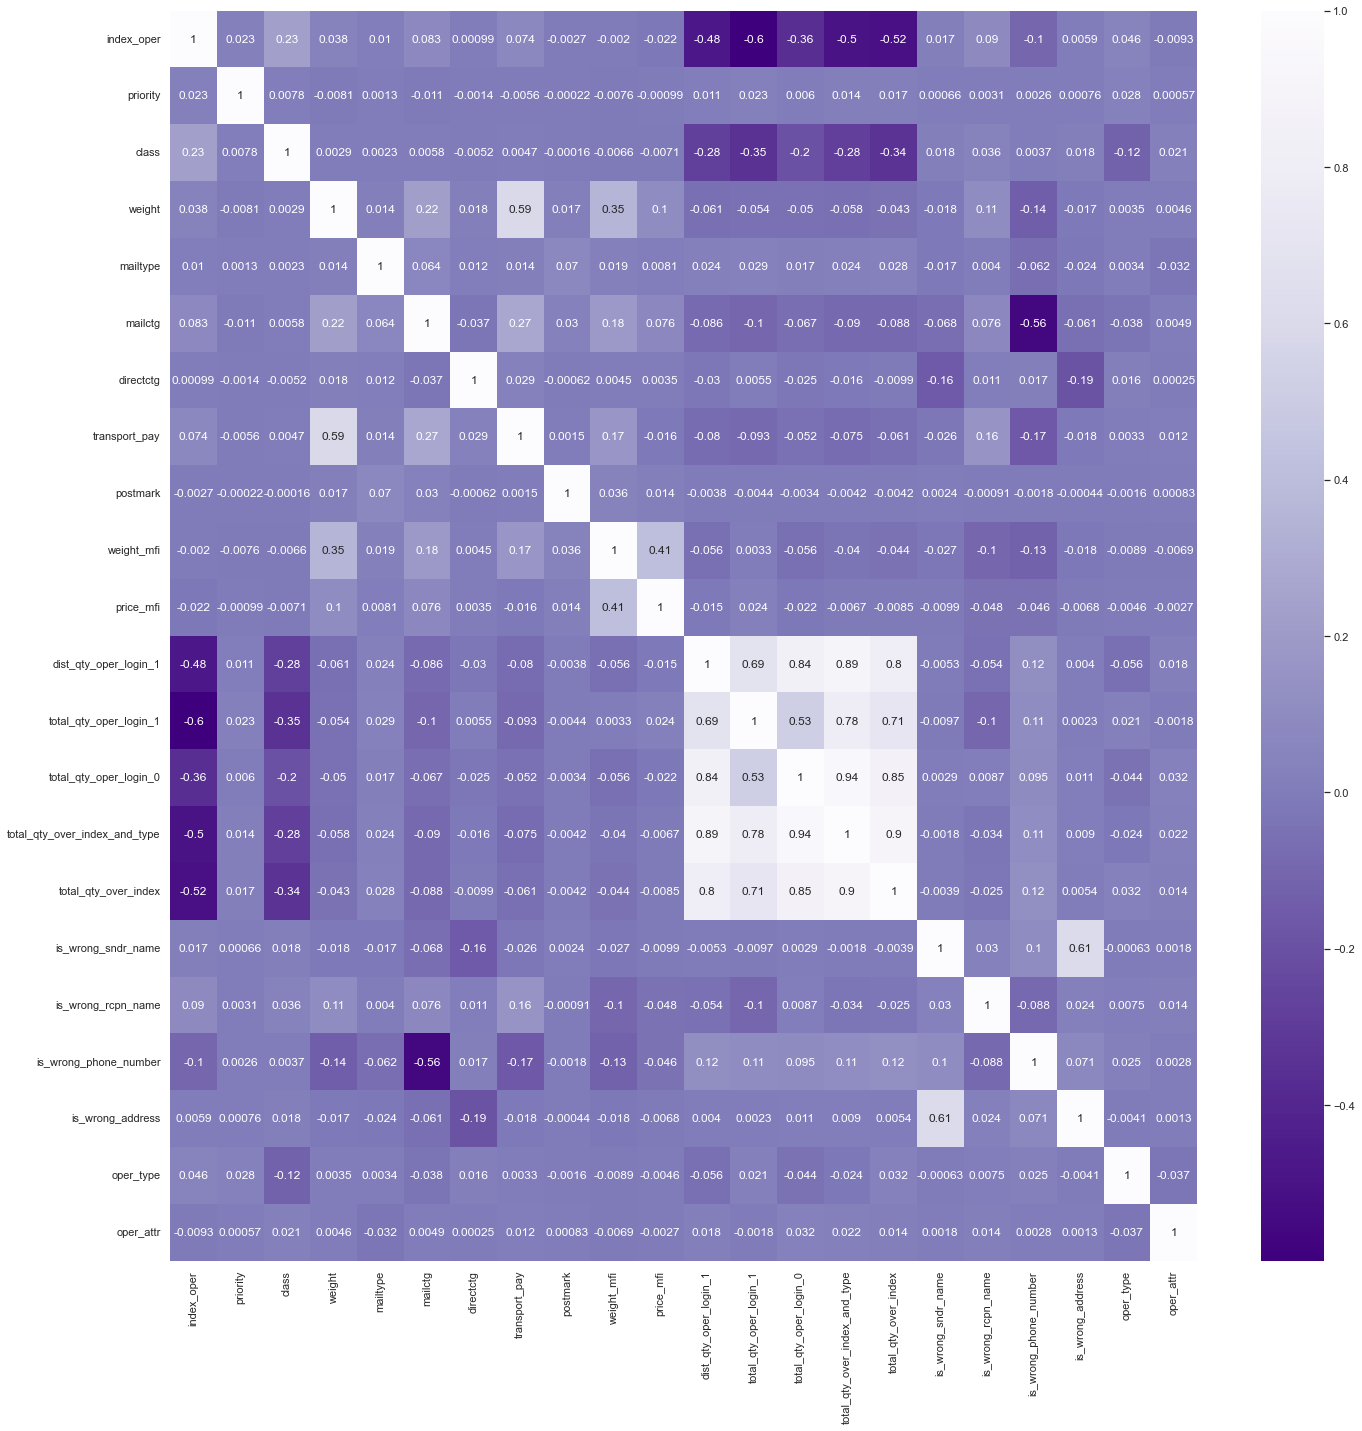

In [26]:
sns.set(rc={'figure.figsize':(23, 23)})
sns.heatmap(data_train.drop(['id','label','mailrank'], axis=1).corr(), cmap='Purples_r', annot=True);

##### *Удаляем коррелированные и ненужные столбцы*

In [27]:
data_train = data_train.drop(['id', 
                              'mailrank', 
                              'total_qty_over_index_and_type', 
                              'total_qty_over_index'], axis=1)
data_test = data_test.drop(['mailrank', 
                            'total_qty_over_index_and_type', 
                            'total_qty_over_index'], axis=1)

##### *Приведем обозначение типа почтовой связи к категориальному признаку*

In [28]:
data_train["type"] = pd.Categorical(data_train["type"])
data_train["type"].astype('category').cat.codes
data_train["type"] = data_train["type"].cat.codes

data_test["type"] = pd.Categorical(data_test["type"])
data_test["type"].astype('category').cat.codes
data_test["type"] = data_test["type"].cat.codes

##### *Маппинг*

In [29]:
data_train['is_privatecategory'] = data_train['is_privatecategory'].map({'Y': 1, 'N': 2, '0': 0}).astype(int)
data_train['is_in_yandex'] = data_train['is_in_yandex'].map({'Y': 1, 'N': 2, '0': 0}).astype(int)
data_train['is_return'] = data_train['is_return'].map({'Y': 1, 'N': 2, '0': 0}).astype(int)

data_test['is_privatecategory'] = data_test['is_privatecategory'].map({'Y': 1, 'N': 2, '0': 0}).astype(int)
data_test['is_in_yandex'] = data_test['is_in_yandex'].map({'Y': 1, 'N': 2, '0': 0}).astype(int)
data_test['is_return'] = data_test['is_return'].map({'Y': 1, 'N': 2, '0': 0}).astype(int)

##### *Приведение к категориальным признакам для One-Hot-Encoding*

In [30]:
data_train['priority'] = data_train['priority'].astype(int)
data_train['class'] = data_train['class'].astype(int)
data_train['postmark'] = data_train['postmark'].astype(int)
data_train['directctg'] = data_train['directctg'].astype(int)
data_train['mailctg'] = data_train['mailctg'].astype(int)
data_train['mailtype'] = data_train['mailtype'].astype(int)

data_test['priority'] = data_test['priority'].astype(int)
data_test['class'] = data_test['class'].astype(int)
data_test['mailctg'] = data_test['mailctg'].astype(int)
data_test['directctg'] = data_test['directctg'].astype(int)
data_test['postmark'] = data_test['postmark'].astype(int)
data_test['mailtype'] = data_test['mailtype'].astype(int)

In [31]:
data_train.shape, data_test.shape

((6000000, 26), (4000000, 26))

##### *Стандартизация значений*

In [32]:
float_features = ['weight', 
                  'weight_mfi', 
                  'price_mfi',
                  'transport_pay',
                  'dist_qty_oper_login_1', 
                  'total_qty_oper_login_1', 
                  'total_qty_oper_login_0']

In [33]:
data_train[float_features] = stats.zscore(data_train[float_features])
data_test[float_features] = stats.zscore(data_test[float_features])

In [34]:
data_train.head(3)

,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,...,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label,oper_type,oper_attr
0,628629,18,7503,2,0,1,2,-0.339684,5,1,...,-0.690516,-0.930923,-0.542342,0,0,0,0,0,1043,-1
1,102976,3,7503,2,0,2,2,-0.295279,5,1,...,1.482697,0.726867,1.018512,0,0,0,0,0,1023,-1
2,620962,19,7503,2,0,1,2,-0.421833,5,1,...,-0.640671,-0.843925,-0.482837,0,1,0,0,0,1018,-1


In [35]:
data_train.dtypes

index_oper                  int32
type                         int8
priority                    int32
is_privatecategory          int32
class                       int32
is_in_yandex                int32
is_return                   int32
weight                    float64
mailtype                    int32
mailctg                     int32
directctg                   int32
transport_pay             float64
postmark                    int32
name_mfi                   object
weight_mfi                float64
price_mfi                 float64
dist_qty_oper_login_1     float64
total_qty_oper_login_1    float64
total_qty_oper_login_0    float64
is_wrong_sndr_name          int64
is_wrong_rcpn_name          int64
is_wrong_phone_number       int64
is_wrong_address            int64
label                       int64
oper_type                   int32
oper_attr                   int32
dtype: object

### Сохранение обработанных выборок

In [36]:
data_train.to_csv("content/data_train_preprocessed.csv", line_terminator='\n')

In [37]:
data_test.to_csv("content/data_test_preprocessed.csv", line_terminator='\n')